# Pneumonia Classification with X-ray Image

In [1]:
# 필요한 모듈 import
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os
import sys
import shutil

In [2]:
#normal data
normal_data_path = '/Users/jungjihoon/Desktop/Practice/Project_1_Pneumonia_Classification/chest_xray/train/NORMAL/'
full_names_n = os.listdir(normal_data_path)

In [3]:
#pneumonial data
pneumonia_data_path = '/Users/jungjihoon/Desktop/Practice/Project_1_Pneumonia_Classification/chest_xray/train/PNEUMONIA/'
full_names_p = os.listdir(pneumonia_data_path)

Text(0.5, 0, 'person395_bacteria_1794.jpeg')

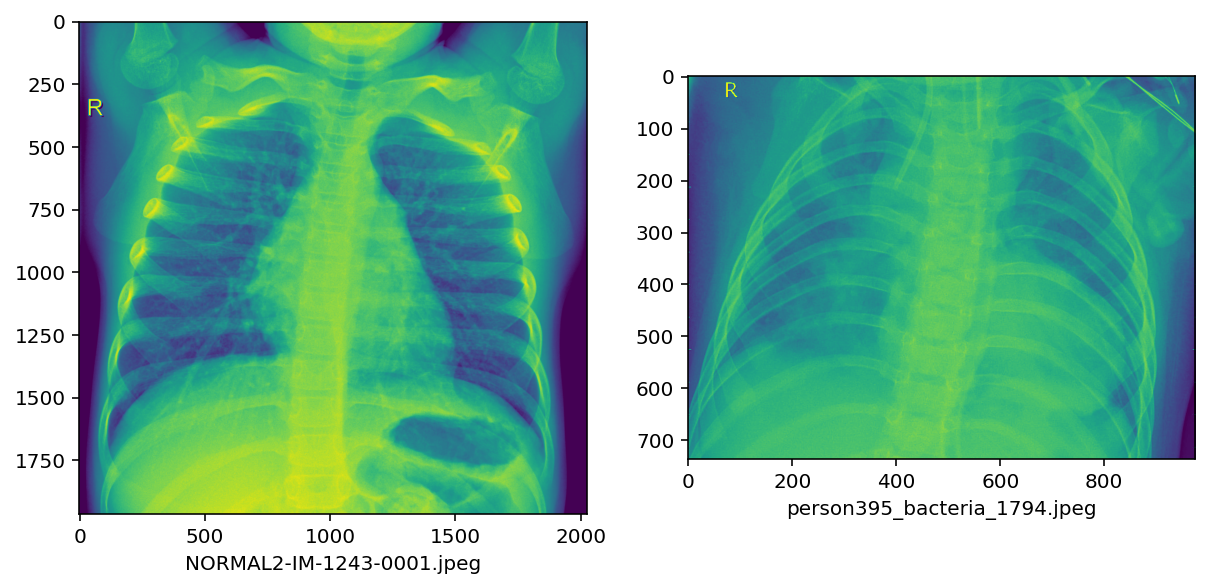

In [4]:
#normal data & pneumonia data visualization
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample_n = random.choice(full_names_n)
sample_p = random.choice(full_names_p)
img_n = mpimg.imread(normal_data_path + sample_n)
img_p = mpimg.imread(pneumonia_data_path + sample_p)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_n)
plt.xlabel(sample_n)
plt.subplot(122)
plt.imshow(img_p)
plt.xlabel(sample_p)

In [5]:
# 크기도 다 다르다
sample_p = random.choice(full_names_p)
sample_n = random.choice(full_names_n)

image_n = mpimg.imread(normal_data_path + sample_n)
image_p = mpimg.imread(pneumonia_data_path + sample_p)
image_n.shape, image_p.shape

((1310, 1542), (960, 1256))

In [6]:
#각 데이터 

# train data
train_n_path = '/Users/jungjihoon/Desktop/Practice/Project_1_Pneumonia_Classification/chest_xray/train/NORMAL/'
train_n_full_names = os.listdir(train_n_path)
train_p_path = '/Users/jungjihoon/Desktop/Practice/Project_1_Pneumonia_Classification/chest_xray/train/PNEUMONIA/'
train_p_full_names = os.listdir(train_p_path)

# validation 데이터
val_n_path = '/Users/jungjihoon/Desktop/Practice/Project_1_Pneumonia_Classification/chest_xray/val/NORMAL/'
val_n_full_names = os.listdir(val_n_path)
val_p_path = '/Users/jungjihoon/Desktop/Practice/Project_1_Pneumonia_Classification/chest_xray/val/PNEUMONIA/'
val_p_full_names = os.listdir(val_p_path)

# Test 데이터
test_n_path = '/Users/jungjihoon/Desktop/Practice/Project_1_Pneumonia_Classification/chest_xray/test/NORMAL/'
test_n_full_names = os.listdir(test_n_path)
test_p_path = '/Users/jungjihoon/Desktop/Practice/Project_1_Pneumonia_Classification/chest_xray/test/PNEUMONIA/'
test_p_full_names = os.listdir(test_p_path)

full_names_list = [train_n_full_names, train_p_full_names, val_n_full_names, val_p_full_names, test_n_full_names, test_p_full_names]
path_list = [train_n_path, train_p_path, val_n_path, val_p_path, test_n_path, test_p_path]



In [24]:
# 각 데이터 라벨링
# normal = 0
# Pneumonia = 1
train_n_id = [ 0 for i in range(len(full_names_list[0]))]
train_p_id = [ 1 for i in range(len(full_names_list[1]))]
val_n_id = [ 0 for i in range(len(full_names_list[2]))]
val_p_id = [ 1 for i in range(len(full_names_list[3]))]
test_n_id = [ 0 for i in range(len(full_names_list[4]))]
test_p_id = [ 1 for i in range(len(full_names_list[5]))]

In [11]:
#그림 사이즈 동일화 시키기
from tqdm.notebook import tqdm

train_n_images = []
train_p_images = []
val_n_images = []
val_p_images = []
test_n_images = []
test_p_images = []
images_list = [train_n_images, train_p_images, val_n_images, val_p_images, test_n_images, test_p_images]

for n in range(1,7):
    bar_total = tqdm(full_names_list[n-1])
    for file in bar_total:
        image = mpimg.imread(path_list[n-1] + file)
        images_list[n-1].append(resize(image, (227,227,3)))

    images_list[n-1] = np.array(images_list[n-1])



  0%|          | 0/1341 [00:00<?, ?it/s]

  0%|          | 0/3875 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/234 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

In [34]:
#list to array
train_data = np.array(train_n_images + train_p_images)
train_data_label = np.array(train_n_id + train_p_id)
val_data = np.array(val_n_images + val_p_images)
val_data_label = np.array(val_n_id + val_p_id)
test_data = np.array(test_n_images + test_p_images)
test_data_label = np.array(test_n_id + test_p_id)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_data_label, test_size=0.2, random_state=13)
X_train.shape, X_test.shape

((4172, 227, 227, 3), (1044, 227, 227, 3))

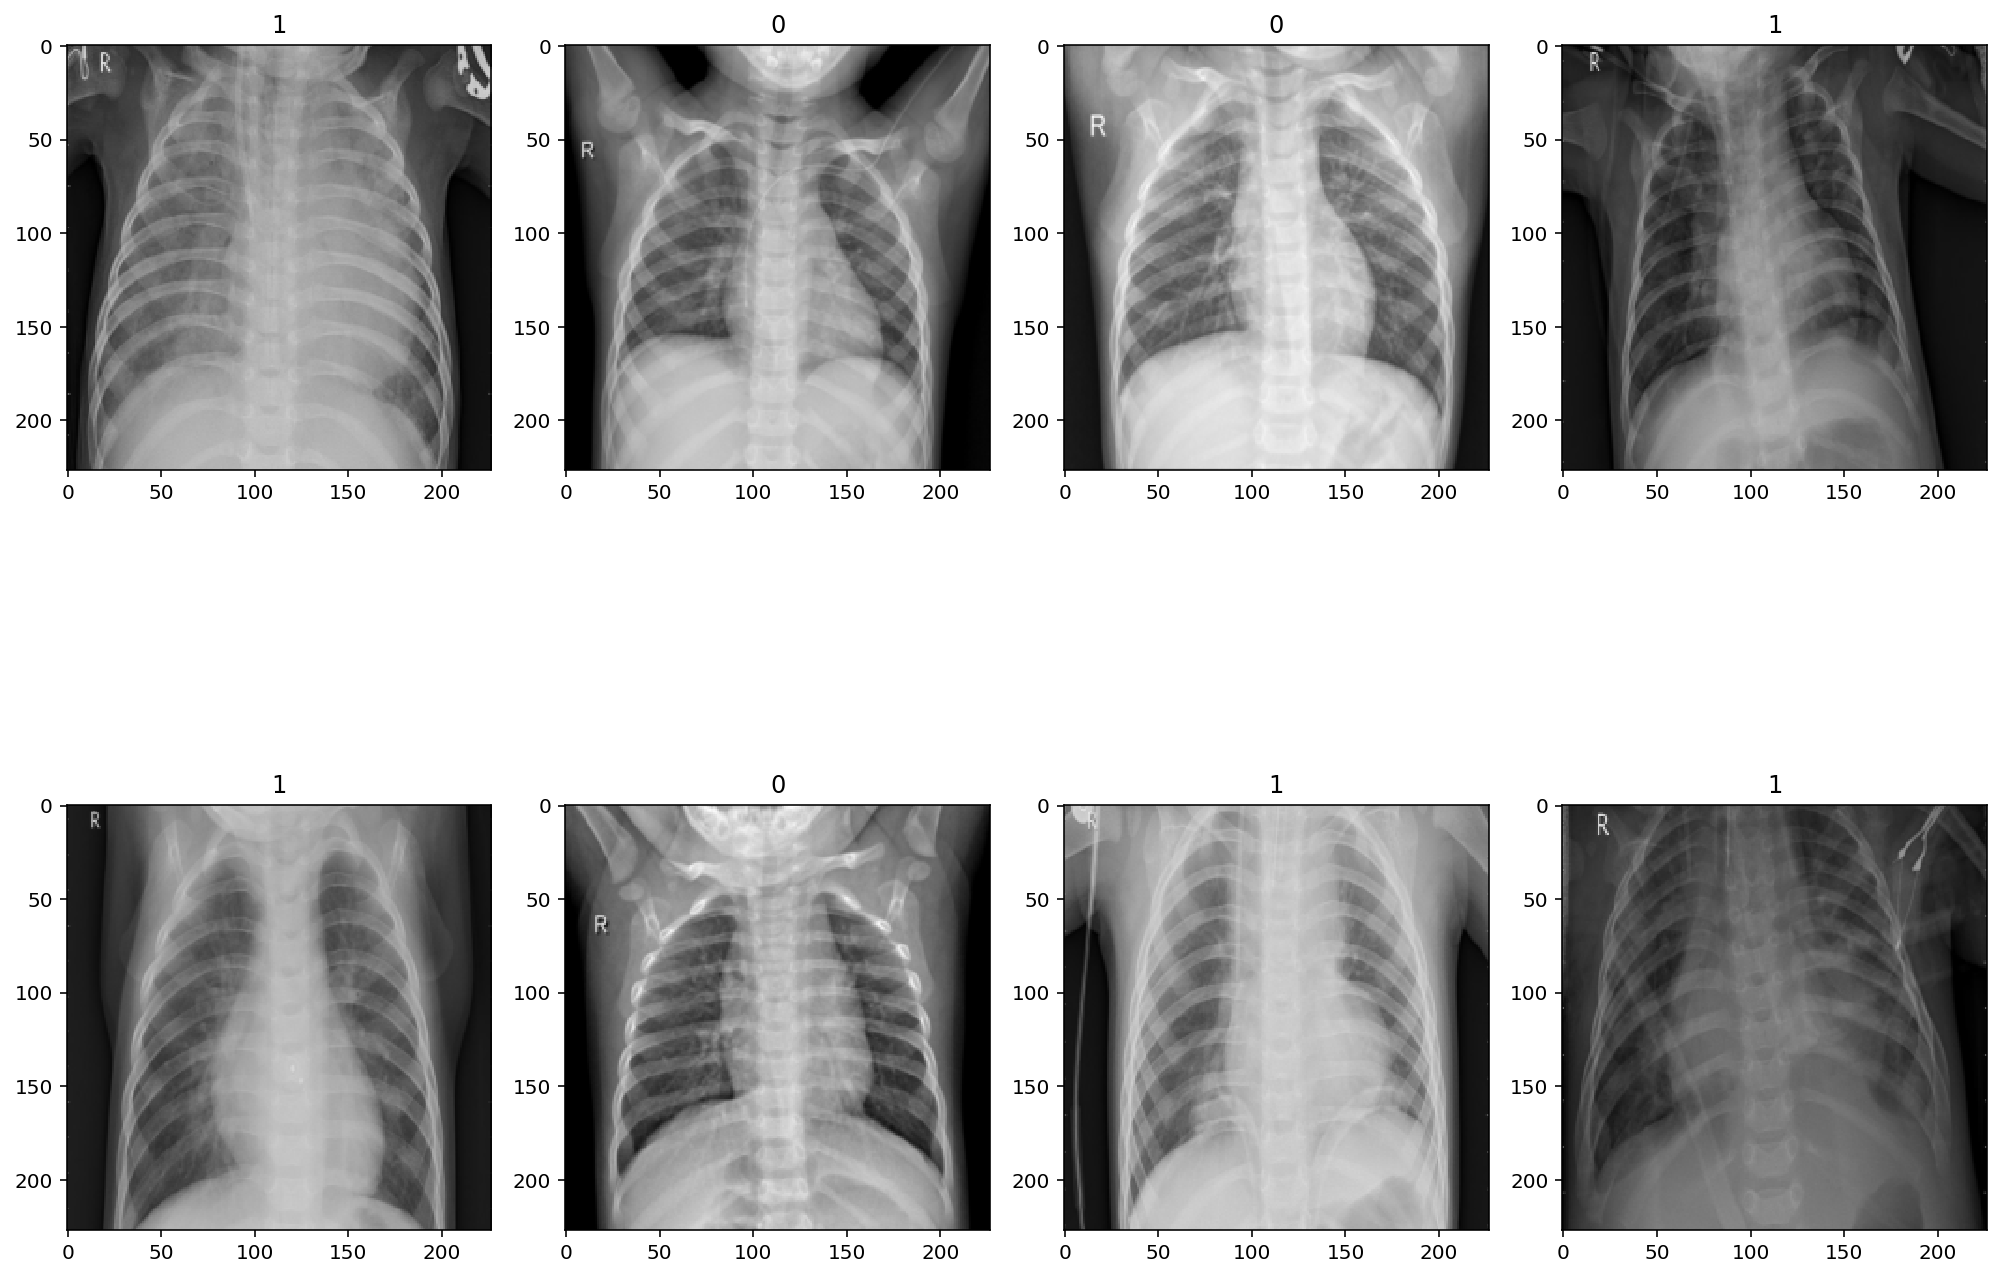

In [38]:
#데이터 들여다보기
samples = random.choices(population=range(0,4172), k=8)

plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])
    
plt.tight_layout()
plt.show()

In [40]:
# AlexNet
from tensorflow.keras import layers,models

model_AN = models.Sequential([
    layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(256, (5, 5), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(384, (3, 3), strides=(1,1), padding='same', activation='relu'),
    
    layers.Conv2D(384, (3, 3), strides=(1,1), padding='same', activation='relu'),
    
    layers.Conv2D(256, (3, 3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(1000, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model_AN.summary()

2021-12-24 23:14:36.524347: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-24 23:14:36.526450: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                          

In [41]:
model_AN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
import time
start_time = time.time()
hist = model_AN.fit(X_train.reshape(4172, 227, 227, 3), y_train, epochs=20, verbose=1, 
                 validation_data= (val_data, val_data_label))
print('fit_time : ', time.time()- start_time)

Epoch 1/20
131/131 [==============================] - 33s 247ms/step - loss: 0.0551 - accuracy: 0.9839 - val_loss: 4.2733e-04 - val_accuracy: 1.0000
Epoch 2/20
131/131 [==============================] - 32s 244ms/step - loss: 0.0594 - accuracy: 0.9830 - val_loss: 0.5591 - val_accuracy: 0.9375
Epoch 3/20
131/131 [==============================] - 32s 245ms/step - loss: 0.0434 - accuracy: 0.9866 - val_loss: 0.4281 - val_accuracy: 0.8125
Epoch 4/20
131/131 [==============================] - 32s 246ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.0596 - val_accuracy: 1.0000
Epoch 5/20
131/131 [==============================] - 32s 244ms/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.3841 - val_accuracy: 0.8750
Epoch 6/20
131/131 [==============================] - 32s 245ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 7/20
131/131 [==============================] - 32s 246ms/step - loss: 0.0390 - accuracy: 0.9859 - val_loss: 2.1698 - va

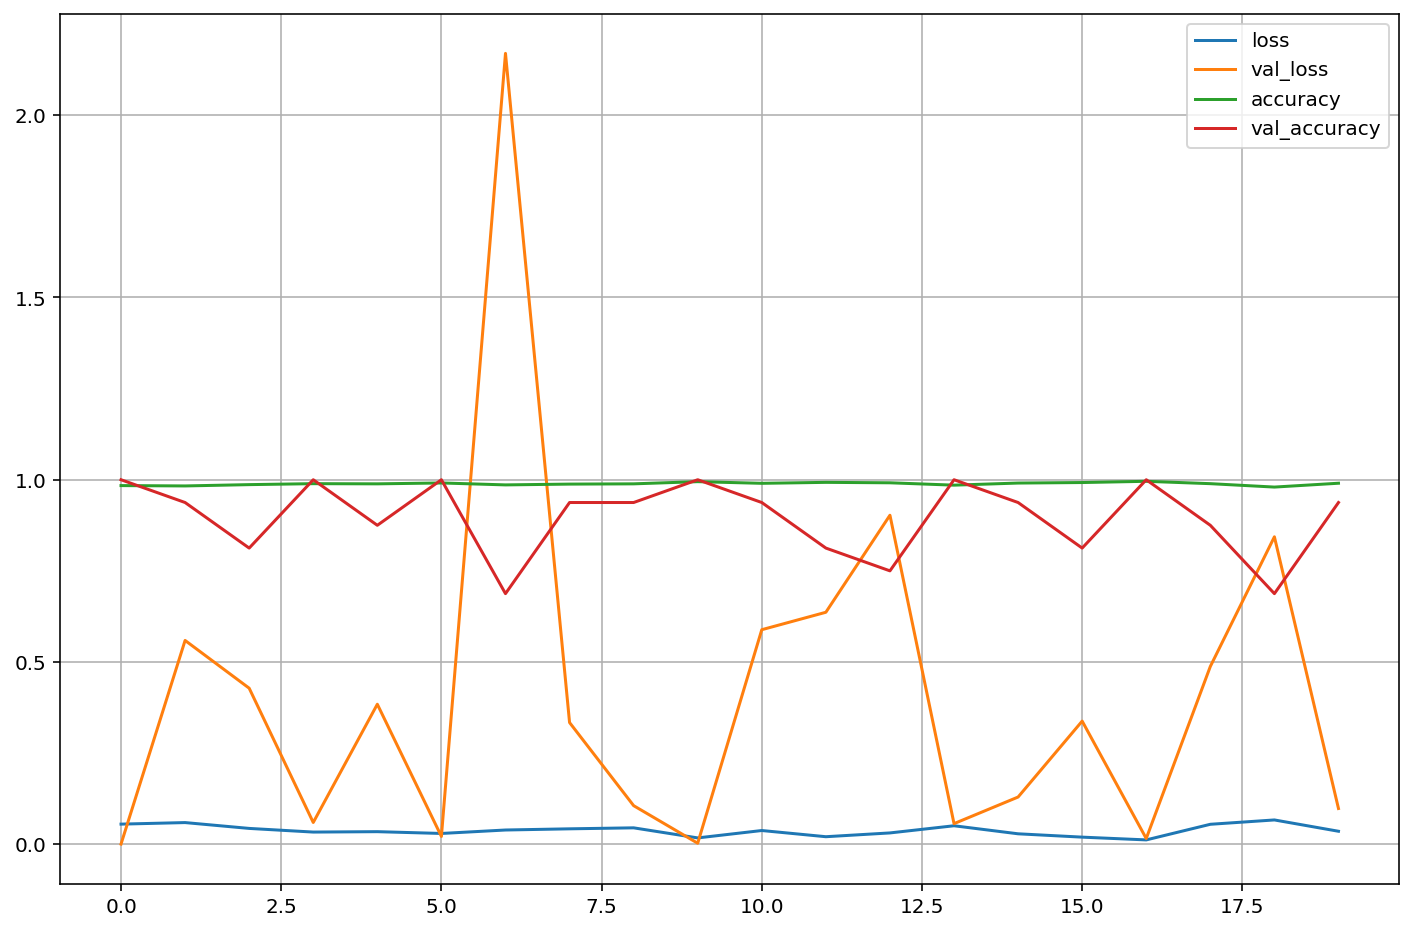

In [50]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [51]:
#Test 데이터 평가
test_loss, test_score = model_AN.evaluate(X_test, y_test, batch_size=16)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

66/66 [==============================] - 2s 33ms/step - loss: 0.2737 - accuracy: 0.9626
Loss on test set:  0.2736509144306183
Accuracy on test set:  0.9626436829566956


In [83]:
# X_test 데이터를 가지고 예측 한 값 저장
preds = model_AN.predict(X_test, batch_size=16)
preds = np.argmax(preds, axis=1)

# Classification project confusion matrix 생성 함수
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

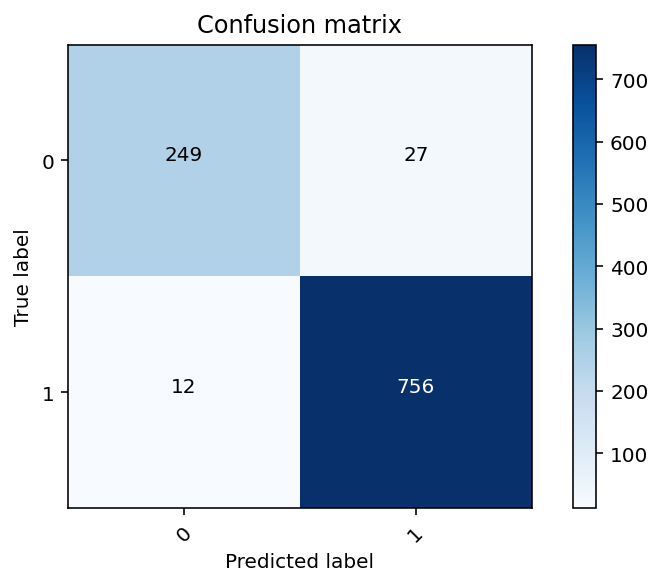

In [87]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, preds)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [88]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

print('Accuracy Score : ', accuracy_score(y_test, preds))
print('Recall : ', recall_score(y_test, preds))
print('Precision : ', precision_score(y_test, preds))
print('AUC score : ', roc_auc_score(y_test, preds))
print('F1 score : ', f1_score(y_test, preds))


Accuracy Score :  0.9626436781609196
Recall :  0.984375
Precision :  0.9655172413793104
AUC score :  0.9432744565217391
F1 score :  0.9748549323017408


In [91]:
# VGG-19 model 적용
# 16 Convolution Layers + 3 Fully Connected Layers
# 3x3 Convolution filters
# stride : 1
# padding : 1
# 2x2 Maxpooling (stride : 2)
# Relu

VGG19 =  models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(227, 227, 3), strides=(1,1), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
    
    layers.Conv2D(128, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
    
    layers.Conv2D(256, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
    
    layers.Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),    
    
    layers.Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'),
    layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),    

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(1000, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
    
])

VGG19.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 227, 227, 64)      1792      
                                                                 
 conv2d_38 (Conv2D)          (None, 227, 227, 64)      36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 113, 113, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 113, 113, 128)     73856     
                                                                 
 conv2d_40 (Conv2D)          (None, 113, 113, 128)     147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

### 위 모델로 해봤지만 시간이 오래걸려 keras내에 vgg16 모듈을 사용하기로 함

In [97]:
from keras.applications.vgg16 import VGG16

# weight='imagenet' : 이미지넷으로 트레이닝된 모델을 불러온다
# include_top = false : FC를 제외한다
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# 마지막 4개 레이어를 제외한 레이어를 고정합니다.
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# 개별 도면층의 교육 가능 상태 확인
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
    
# 모형 작성
model_vgg = models.Sequential()

# vgg 변환 기반 모델 추가
model_vgg.add(vgg_conv)

# 새 도면층 추가
model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(1024, activation='relu'))
model_vgg.add(layers.Dropout(0.5))
model_vgg.add(layers.Dense(2, activation='softmax'))

# 모델의 요약을 표시합니다. 교육 가능한 파라미터 수 확인
model_vgg.summary()


58900480/58889256 [==============================] - 2s 0us/step
<keras.engine.input_layer.InputLayer object at 0x168f48520> False
<keras.layers.convolutional.Conv2D object at 0x28cb58b80> False
<keras.layers.convolutional.Conv2D object at 0x289f19cd0> False
<keras.layers.pooling.MaxPooling2D object at 0x28cb7b970> False
<keras.layers.convolutional.Conv2D object at 0x28ca53e50> False
<keras.layers.convolutional.Conv2D object at 0x28cbbeb80> False
<keras.layers.pooling.MaxPooling2D object at 0x178504a90> False
<keras.layers.convolutional.Conv2D object at 0x28ca5e790> False
<keras.layers.convolutional.Conv2D object at 0x178504610> False
<keras.layers.convolutional.Conv2D object at 0x17aaf63a0> False
<keras.layers.pooling.MaxPooling2D object at 0x17aaf6880> False
<keras.layers.convolutional.Conv2D object at 0x17850df10> False
<keras.layers.convolutional.Conv2D object at 0x168f48790> False
<keras.layers.convolutional.Conv2D object at 0x28ca53100> False
<keras.layers.pooling.MaxPooling2D ob

In [98]:
model_vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [99]:
import time
start_time = time.time()
hist = model_vgg.fit(X_train.reshape(4172, 227, 227, 3), y_train, epochs=20, verbose=1, 
                 validation_data= (val_data, val_data_label))
print('fit_time : ', time.time()- start_time)

Epoch 1/20


2021-12-25 19:27:45.161220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - ETA: 0s - loss: 0.4436 - accuracy: 0.8253

2021-12-25 19:29:18.936391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - 95s 715ms/step - loss: 0.4436 - accuracy: 0.8253 - val_loss: 0.8432 - val_accuracy: 0.6875
Epoch 2/20
131/131 [==============================] - 94s 715ms/step - loss: 0.1835 - accuracy: 0.9398 - val_loss: 1.8641 - val_accuracy: 0.6250
Epoch 3/20
131/131 [==============================] - 95s 728ms/step - loss: 0.2271 - accuracy: 0.9473 - val_loss: 0.2428 - val_accuracy: 0.9375
Epoch 4/20
131/131 [==============================] - 94s 717ms/step - loss: 0.0609 - accuracy: 0.9763 - val_loss: 0.3593 - val_accuracy: 0.9375
Epoch 5/20
131/131 [==============================] - 93s 712ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.2619 - val_accuracy: 0.9375
Epoch 6/20
131/131 [==============================] - 94s 721ms/step - loss: 0.0261 - accuracy: 0.9902 - val_loss: 0.7754 - val_accuracy: 0.8125
Epoch 7/20
131/131 [==============================] - 93s 710ms/step - loss: 0.1077 - accuracy: 0.9674 - val_loss: 0.9530 - val_accuracy: 0.7

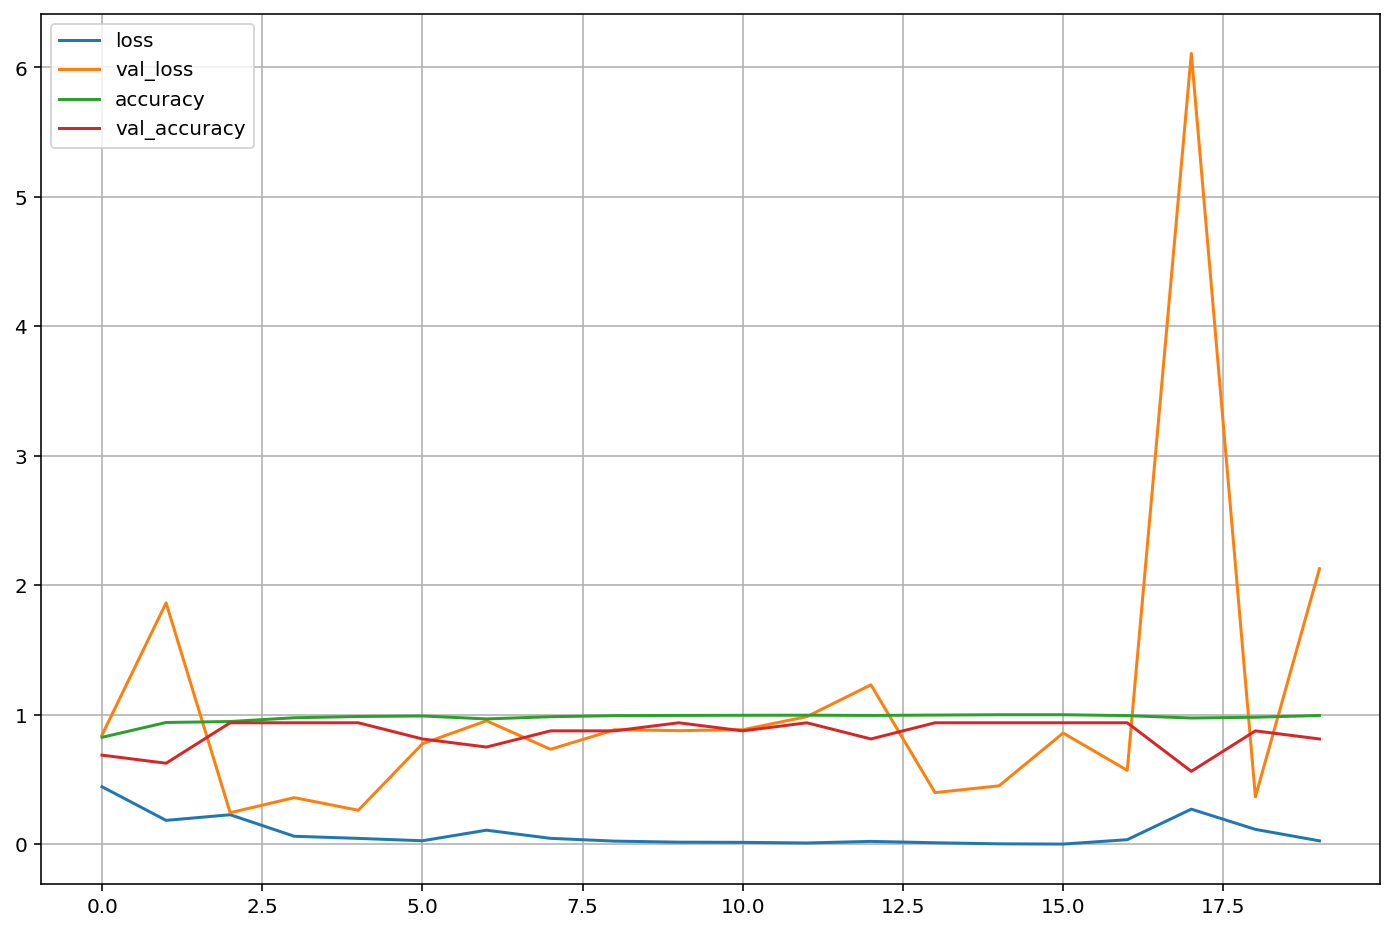

In [100]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [102]:
#Test 데이터 평가
test_loss, test_score = model_vgg.evaluate(X_test, y_test, batch_size=16)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

66/66 [==============================] - 19s 293ms/step - loss: 0.2102 - accuracy: 0.9799
Loss on test set:  0.21023112535476685
Accuracy on test set:  0.9798850417137146


In [103]:
# X_test 데이터를 가지고 예측 한 값 저장
preds = model_vgg.predict(X_test, batch_size=16)
preds = np.argmax(preds, axis=1)

2021-12-25 20:02:07.674922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


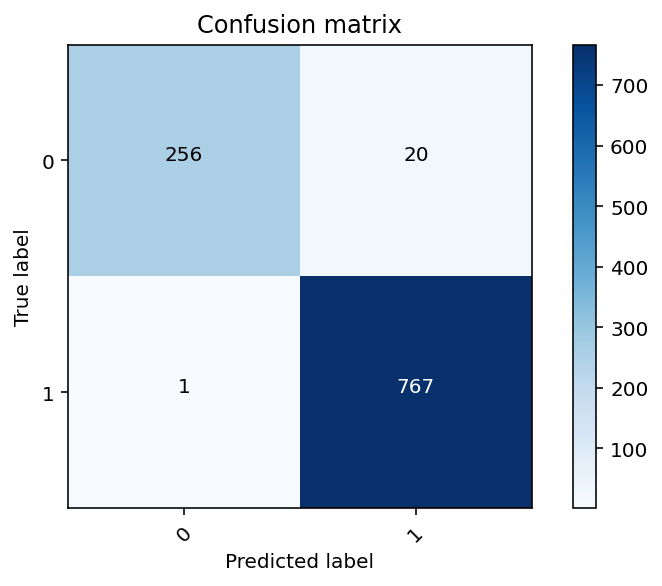

In [104]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, preds)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [105]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

print('Accuracy Score : ', accuracy_score(y_test, preds))
print('Recall : ', recall_score(y_test, preds))
print('Precision : ', precision_score(y_test, preds))
print('AUC score : ', roc_auc_score(y_test, preds))
print('F1 score : ', f1_score(y_test, preds))


Accuracy Score :  0.9798850574712644
Recall :  0.9986979166666666
Precision :  0.974587039390089
AUC score :  0.9631170742753622
F1 score :  0.9864951768488747


### AlexNet 모델 적용 시 Recall score : 0.9844
### VGG16 모델 적용 시 Recall score : 0.9987
### 확실히 VGG16 모델을 적용할 때 더 좋은 성능을 보여주었다.
### Recall를 가장 중요한 score로 본 이유는 실제 환자를 정상으로 분류하는 일을 범하면 안되기 때문이다.
